##Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


## Define required functions

In [2]:
def db_to_pa(SPL:float):

  return (20*10**(-6))*(10**(SPL/20))

def pa_to_db(Pressure:float):

  return 20*math.log10(Pressure/(20*10**(-6)))

def global_SPL(SPL_list:list):

  global_pressure = 0
  for band_SPL in SPL_list:
    global_pressure += db_to_pa(band_SPL)
  
  global_SPL = pa_to_db(global_pressure)
  
  return global_SPL


## Definition of value 

In [3]:
human_threshold = np.array([50, 30, 17, 6, 0, -3, -5, 8])     #Defined according human's threshold of audibility

dog_threshold = np.array([50 ,28, 18, 2, -10, -20, -25, -10]) #Defined according to Lipman and Grassi (1942)

A_weighting = np.array([-26,-16,-9,-3,0,1,1,-1])

dryer_measured_SPL = np.array([60,60,60,60,60,60,50,47])*1.37 #Defined according to Akhmetov, Gupta and Ahuja,

## Calculation of how noise is perceived

In [4]:
dog_weighting = human_threshold - dog_threshold

human_perceived = dryer_measured_SPL + A_weighting

dog_perceived = dryer_measured_SPL + A_weighting + dog_weighting


#Plot

<bound method Figure.savefig of <Figure size 432x288 with 1 Axes>>

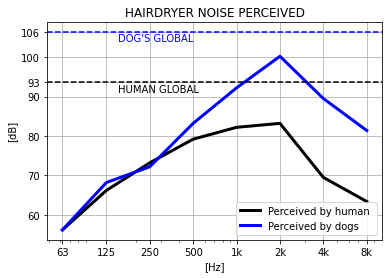

In [5]:
bands = [62,125,250,500,1000,2000,4000,8000]

fig, ax = plt.subplots()

ax.plot(bands,human_perceived,"k-",bands,dog_perceived,"b-",linewidth=3)

ax.set_xscale("log")
ax.axhline(global_SPL(human_perceived),color="k",linestyle="--")
ax.axhline(global_SPL(dog_perceived),color="b",linestyle="--")
ax.text(x=150,y=int(global_SPL(human_perceived))-2,s="HUMAN GLOBAL")
ax.text(x=150,y=int(global_SPL(dog_perceived))-2,s="DOG'S GLOBAL",color="b")
xlabels = "63 125 250 500 1k 2k 4k 8k".split(" ")
yticks  = [60,70,80,90,global_SPL(human_perceived),100,global_SPL(dog_perceived)]
ylabels = ["60","70","80","90",str(int(global_SPL(human_perceived))),"100",str(int(global_SPL(dog_perceived)))]
ax.set_yticks(ticks=yticks)
ax.set_yticklabels(labels=ylabels)
ax.set_xticks(ticks=bands)
ax.set_xticklabels(labels=xlabels)
ax.legend(("Perceived by human ","Perceived by dogs"))
ax.set_title("HAIRDRYER NOISE PERCEIVED")
ax.set_ylabel("[dB]")
ax.set_xlabel("[Hz]")
ax.grid()
fig.savefig